# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = '../../ADA2017-tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per *month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os    
import seaborn as sns
sns.set_context('notebook')

In [3]:
EBOLA = DATA_FOLDER + '/ebola'

GUINEA = EBOLA + '/guinea_data'
LIBERIA = EBOLA + '/liberia_data'
SIERRA = EBOLA + '/sl_data'

import os
import pandas as pd
import numpy as np

files_guinea = os.listdir(GUINEA)
files_liberia = os.listdir(LIBERIA)
files_sierra = os.listdir(SIERRA)

list_guinea = []
list_liberia = []
list_sierra = []

for f in files_guinea:
    data = pd.read_csv(GUINEA + '/' + f, parse_dates=['Date'])
    list_guinea.append(data)
    
for f in files_liberia:
    data = pd.read_csv(LIBERIA + '/' + f, parse_dates=['Date'])
    list_liberia.append(data)
    
for f in files_sierra:
    data = pd.read_csv(SIERRA + '/' + f, parse_dates=['date'])
    list_sierra.append(data)

df_guinea = pd.concat(list_guinea, keys=files_guinea, axis=0)
df_liberia = pd.concat(list_liberia, keys=files_liberia, axis=0)
df_liberia.rename(columns={'Variable': 'Description', 'National': 'Totals'}, inplace=True)
df_sierra = pd.concat(list_sierra, keys=files_sierra, axis=0)
df_sierra.rename(columns={'date': 'Date', 'variable': 'Description', 'National': 'Totals'}, inplace=True)

df = pd.concat([df_guinea, df_liberia, df_sierra], keys=['Guinea', 'Liberia', 'Sierra'])

In [4]:
### GUINEA ###
df_guinea = df_guinea[['Date', 'Description', 'Totals']]
new_cases = df_guinea['Description'] == 'New cases of confirmed'
nc_guinea = df_guinea[new_cases]
nc_guinea = nc_guinea[['Date', 'Totals']]
nc_guinea['Totals'] = nc_guinea['Totals'].astype(int)

nc_guinea_grouped = nc_guinea.groupby(nc_guinea['Date'].dt.month)
guinea_nc_mean = nc_guinea_grouped[['Totals']].mean()

guinea_nc_mean

,Totals
Date,
8,12.4
9,13.0
10,6.0


In [6]:
new_deaths = (df_guinea['Description'] == 'New deaths registered') | (df_guinea['Description'] == 'New deaths registered today')
nd_guinea = df_guinea[new_deaths]
nd_guinea = nd_guinea[['Date', 'Totals']]
nd_guinea['Totals'] = nd_guinea['Totals'].astype(int)

nd_guinea_grouped = nd_guinea.groupby(nd_guinea['Date'].dt.month)
guinea_nd_mean = nd_guinea_grouped[['Totals']].mean()

guinea_nd_mean

,Totals
Date,
8,3.4000
9,3.5625
10,15.0000


In [7]:
### LIBERIA ###
df_liberia = df_liberia[['Date', 'Description', 'Totals']]
new_cases = df_liberia['Description'] == 'New case/s (confirmed)'
nc_liberia = df_liberia[new_cases]
nc_liberia = nc_liberia[['Date', 'Totals']]

#There are some missing values in the column 'Totals' and they cannot be found using the informations from other columns
#Thus we decided to drop them. An interpolation could be applied to guess their values but it wouldn't change the mean
#a lot

#nc_liberia['Totals'] = nc_liberia['Totals'].fillna(0)
nc_liberia.dropna(axis=0, how='any', inplace=True)

In [8]:
nc_liberia['Totals'] = nc_liberia['Totals'].astype(int)

nc_liberia_grouped = nc_liberia.groupby(nc_liberia['Date'].dt.month)
liberia_nc_mean = nc_liberia_grouped[['Totals']].mean()
liberia_nc_mean

,Totals
Date,
6,2.142857
7,1.818182
8,5.444444
9,6.166667
10,1.619048
11,7.800000
12,2169.375000


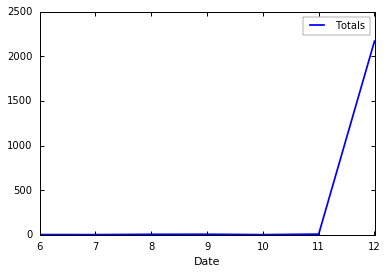

In [10]:
liberia_nc_mean.plot();

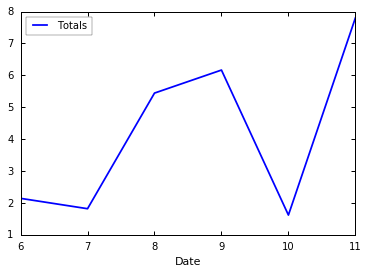

In [11]:
#Here the last value (for december) is extremely high compared to other ones and it is likely to be a measurement error
#Here's the graph without that outlier (we could interpolate to find a consistent value)
liberia_nc_mean.loc[6:11].plot();

In [12]:
new_deaths = df_liberia['Description'] == 'Newly reported deaths'
nd_liberia = df_liberia[new_deaths]
nd_liberia = nd_liberia[['Date', 'Totals']]


#nd_liberia['Totals'] = nd_liberia['Totals'].fillna(0)
#Drop unknown values
nd_liberia.dropna(axis=0, how='any', inplace=True)

nd_liberia['Totals'] = nd_liberia['Totals'].astype(int)

nd_liberia_grouped = nd_liberia.groupby(nd_liberia['Date'].dt.month)
liberia_nd_mean = nd_liberia_grouped[['Totals']].mean()

liberia_nd_mean

,Totals
Date,
6,2.000000
7,4.272727
8,23.222222
9,37.608696
10,28.040000
11,15.538462


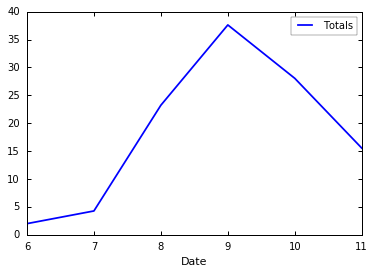

In [13]:
liberia_nd_mean.plot();

In [14]:
### SIERRA ###

#Sometimes we have the values for all the regions but not the total.
#So we sum over columns to fill missing values in 'Totals' columns



dfsl_for_sum = df_sierra.drop(['Date', 'Description', 'Totals'], axis=1).fillna(0)

df_sierra['Totals'] = pd.to_numeric(df_sierra['Totals'], errors='coerce')
previous_values = df_sierra['Totals'].copy()

for c in dfsl_for_sum.columns:
    dfsl_for_sum[c] = pd.to_numeric(dfsl_for_sum[c], errors='coerce')
    
df_sierra['Totals'] = dfsl_for_sum.sum(axis=1)

#Then we have to replace 0 values in 'Totals' by the value we had at first
#Indeed, for files like 2014-11-13.csv, there is the total value but not the values for the regions.
#The sum operated above replaced them with 0
sierra_zeros = df_sierra['Totals'] == 0
df_sierra.loc[sierra_zeros, 'Totals'] = previous_values[sierra_zeros]

In [16]:
df_sierra = df_sierra[['Date', 'Description', 'Totals']]
df_sierra.dropna(axis=0, how='any', inplace=True)


new_cases = df_sierra['Description'] == 'new_confirmed'
nc_sierra = df_sierra[new_cases]
nc_sierra = nc_sierra[['Date', 'Totals']]

In [17]:
nc_sierra['Totals'] = nc_sierra['Totals'].astype(int)

nc_sierra_grouped = nc_sierra.groupby(nc_sierra['Date'].dt.month)
sierra_nc_mean = nc_sierra_grouped[['Totals']].mean()
sierra_nc_mean

,Totals
Date,
8,19.600000
9,36.275862
10,57.535714
11,69.894737
12,54.333333


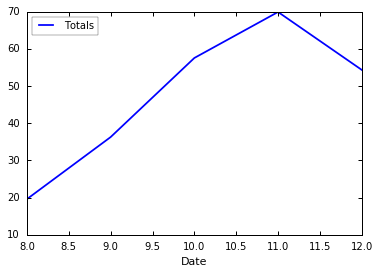

In [18]:
sierra_nc_mean.plot();

In [19]:
new_deaths = df_sierra['Description'] == 'death_confirmed'
nd_sierra = df_sierra[new_deaths]
nd_sierra = nd_sierra[['Date', 'Totals']]

In [20]:
nd_sierra['Totals'] = nd_sierra['Totals'].fillna(0)
nd_sierra['Totals'] = nd_sierra['Totals'].astype(int)

nd_sierra_grouped = nd_sierra.groupby(nd_sierra['Date'].dt.month)
sierra_nd_mean = nd_sierra_grouped[['Totals']].mean()
sierra_nd_mean

,Totals
Date,
8,331.150000
9,473.379310
10,936.250000
11,1319.052632
12,1643.500000


These numbers are very high and increasing which let us think that it is a cumulative number of deaths.

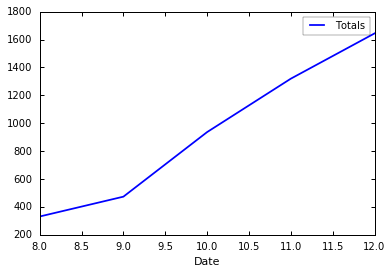

In [21]:
sierra_nd_mean.plot();

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [22]:
# Import the first 9 spreadsheets
dfs = []
filenames = glob.glob(DATA_FOLDER + '/microbiome/MID*.xls')
for i in range(len(filenames)):
    df = pd.read_excel(filenames[i], header=None)
    df['BARCODE'] = 'MID'+str(i+1)
    dfs.append(df)

# Combine them into a single DataFrame
tmp_df = pd.concat(dfs)
tmp_df.columns = ['NAME', 'VALUE', 'BARCODE']

# Add the metadata information from the 10th spreadsheet as columns in the combined DataFrame
metadata = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls", "Sheet1")
metadata = metadata.fillna('unknown').set_index(['BARCODE', 'GROUP', 'SAMPLE'])

# Pivot and replace NaN values by the tag unknown.
df = tmp_df.pivot(index='NAME', columns='BARCODE', values='VALUE')
df.fillna('unknown', inplace=True)
df.columns = metadata.index

# Make sure that the final DataFrame has a unique index
print('Is index unique? ' + str(df.index.is_unique))
df

Is index unique? True


BARCODE,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
GROUP,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
SAMPLE,unknown,tissue,tissue,tissue,tissue,stool,stool,stool,stool
NAME,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [24]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

In [25]:
data3 = pd.read_excel(DATA_FOLDER+'/titanic.xls')
data3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
# Type of each attribute
data3.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [27]:
# We give the value range of some attributes for which there are not too many possible different values. 
categoricals = []
for c in data3.columns:
    value_range = data3[c].unique()
    if len(value_range) < 10:
        categoricals.append(c)
        print("{}: {}".format(c, value_range))

pclass: [1 2 3]
survived: [1 0]
sex: ['female' 'male']
sibsp: [0 1 2 3 4 5 8]
parch: [0 2 1 4 3 5 6 9]
embarked: ['S' 'C' nan 'Q']


In [28]:
# transform the usefull attributes that can be Categorical.
for c in categoricals:     
    data3[c] = data3[c].astype('category')

#### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

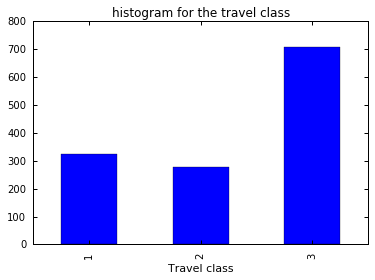

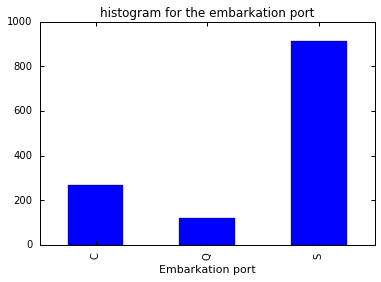

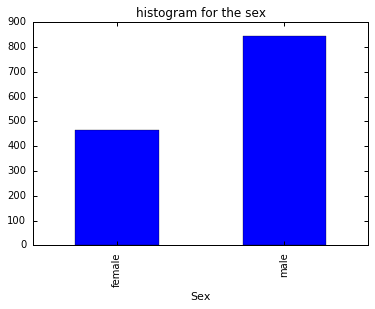

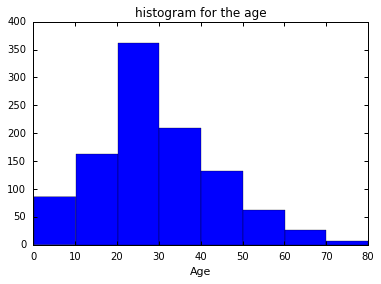

In [29]:
from math import ceil 

df = data3.pclass.value_counts().to_frame().sort_index()
plot = df.plot.bar(title='histogram for the travel class', legend=False);
plot.set_xlabel('Travel class')

df = data3.embarked.value_counts().to_frame().sort_index()
plot = df.plot.bar(title='histogram for the embarkation port', legend=False);
plot.set_xlabel('Embarkation port')
                
df = data3.sex.value_counts().to_frame().sort_index()
plot = df.plot.bar(title='histogram for the sex', legend=False);
plot.set_xlabel('Sex')
                
df = data3.age.to_frame().sort_index()
n_bins = ceil(max(df.values)/10) # For discrete decade intervals.
plot = df.plot.hist(bins = n_bins, title='histogram for the age', legend=False);
plot.set_xlabel('Age')
plot.set_ylabel('');

#### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

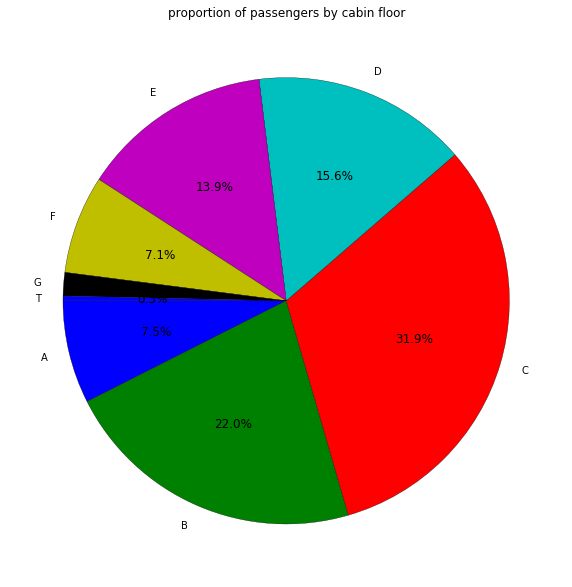

In [30]:
cabins = data3.cabin.dropna().astype(str).str[0] # drop NAN values and keep only the first letter as cabin floor
df = cabins.value_counts().to_frame().sort_index() 
plot = df.cabin.plot.pie(startangle=180, figsize=(10,10), autopct='%1.1f%%');
plot.set_title('proportion of passengers by cabin floor');
plot.set_ylabel('');

#### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

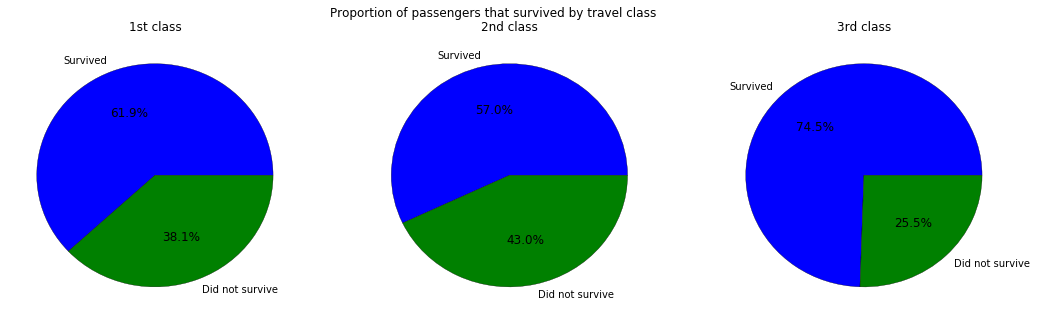

In [31]:
_, axis = plt.subplots(1, 3, figsize=(18,5));

plt.suptitle("Proportion of passengers that survived by travel class")
classes = ["1st", "2nd", "3rd"]

for i, ax in enumerate(axis):
    survived_for_class = data3.query('pclass == @i+1').survived # keep only data for current class
    df = survived_for_class.value_counts().to_frame()           # count number of survivors
    df.index = pd.Index(['Survived', 'Did not survive'])
    plot = df.survived.plot.pie(title=classes[i]+' class', autopct='%1.1f%%', ax=ax)
    plot.set_ylabel('')

#### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

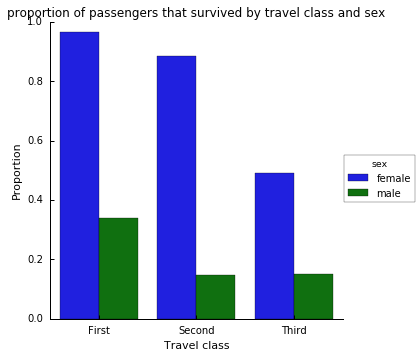

In [32]:
tmp = data3[['pclass', 'sex', 'survived']].copy()
tmp.survived = pd.to_numeric(tmp.survived)
df = tmp.groupby(['pclass', 'sex']).mean().reset_index()

plot = sns.factorplot(data=df, x='pclass', y='survived', hue='sex', kind="bar", size=5);
plot.ax.set_title('proportion of passengers that survived by travel class and sex');
plot.ax.set_xlabel('Travel class');
plot.ax.set_xticklabels(['First', 'Second', 'Third']);
plot.ax.set_ylabel('Proportion');

#### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [33]:
median_age = data3.age.median()
data3['age category'] = ["Olders" if age > median_age else "Youngers" for age in data3.age]
tmp = data3[['age category', 'pclass', 'sex', 'survived']].copy()
tmp.survived = pd.to_numeric(tmp.survived)
df = tmp.groupby(['age category', 'pclass', 'sex']).mean()

print('Is index unique? ' + str(df.index.is_unique))
df

Is index unique? True


survived
age category pclass sex             
Olders       1      female  0.967391
                    male    0.302521
             2      female  0.872340
                    male    0.083333
             3      female  0.372093
                    male    0.144000
Youngers     1      female  0.961538
                    male    0.416667
             2      female  0.898305
                    male    0.206897
             3      female  0.520231
                    male    0.154891